<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Sprint 11

## Paso 1. Abrir el archivo de datos y leer la información general

In [1]:
import pandas as pd

df_logs = pd.read_csv('/datasets/logs_exp_us.csv', sep='\\t')
print(df_logs.head(5))
print()
print(df_logs.info())

/tmp/ipykernel_32/3892741716.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_logs = pd.read_csv('/datasets/logs_exp_us.csv', sep='\\t')


                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de leer los datos utilizando el separador correcto.
</div>

## Paso 2. Preparar los datos para el análisis

In [4]:
# Cambia el nombre de las columnas de manera que sea conveniente para ti ["event_name", "user_id", "event_time", "exp_id"]

df_logs = df_logs.rename(columns={'EventName': 'event_name', 'DeviceIDHash': 'user_id', 'EventTimestamp': 'event_time', 'ExpId': 'exp_id'})
print(df_logs.head(5))

                event_name              user_id  event_time  exp_id
0         MainScreenAppear  4575588528974610257  1564029816     246
1         MainScreenAppear  7416695313311560658  1564053102     246
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248
3         CartScreenAppear  3518123091307005509  1564054127     248
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248


In [5]:
# Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.

df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_name  244126 non-null  object
 1   user_id     244126 non-null  int64 
 2   event_time  244126 non-null  int64 
 3   exp_id      244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
# Convertir el la "user_id" a tipo de dato string

df_logs['user_id'] = df_logs['user_id'].astype(str)
print(df_logs.head(5))

                event_name              user_id  event_time  exp_id
0         MainScreenAppear  4575588528974610257  1564029816     246
1         MainScreenAppear  7416695313311560658  1564053102     246
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248
3         CartScreenAppear  3518123091307005509  1564054127     248
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248


In [7]:
# Encuentra valores faltantes en las columnas 'event_name', 'exp_id' o 'user_id'

print(df_logs.isnull().sum())

# Verifica los tipos de datos en las columnas 'event_name', 'exp_id' o 'user_id'

print(df_logs.dtypes)

event_name    0
user_id       0
event_time    0
exp_id        0
dtype: int64
event_name    object
user_id       object
event_time     int64
exp_id         int64
dtype: object


In [8]:
# Cambia el tipo de dato de la columna event_time al formato fecha

df_logs['event_time'] = pd.to_datetime(df_logs['event_time'], unit='s')
print(df_logs.head(5))

                event_name              user_id          event_time  exp_id
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248


In [9]:
# Agrega una columna de fecha y hora y una columna separada para las fechas.

df_logs['fecha'] = df_logs['event_time'].dt.date
print(df_logs.head(5))

                event_name              user_id          event_time  exp_id  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248   

        fecha  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de hacer un cambio a los tipos de datos de las columnas y renombrarlas.
</div>

## Paso 3. Estudiar y comprobar los datos

In [10]:
# ¿Cuántos eventos hay en los registros?

print('Tenemos 5 eventos en los registros:', df_logs['event_name'].unique())

Tenemos 5 eventos en los registros: ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


In [11]:
# ¿Cuántos usuarios hay en los registros?

print('Tenemos', df_logs['user_id'].nunique(), 'usuarios en los registros.')

Tenemos 7551 usuarios en los registros.


In [12]:
# ¿Cuál es el promedio de eventos por usuario?

print('El promedio de eventos por usuario es:', df_logs.groupby('user_id')['event_name'].count().mean())

El promedio de eventos por usuario es: 32.33028737915508


In [13]:
# ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima.

min_date = df_logs['event_time'].min()
max_date = df_logs['event_time'].max()
print('La fecha mínima es:', min_date)
print('La fecha máxima es:', max_date)
print()
print('El periodo que abarcan las fechas es de:', max_date - min_date)

La fecha mínima es: 2019-07-25 04:43:36
La fecha máxima es: 2019-08-07 21:15:17

El periodo que abarcan las fechas es de: 13 days 16:31:41


<AxesSubplot:>

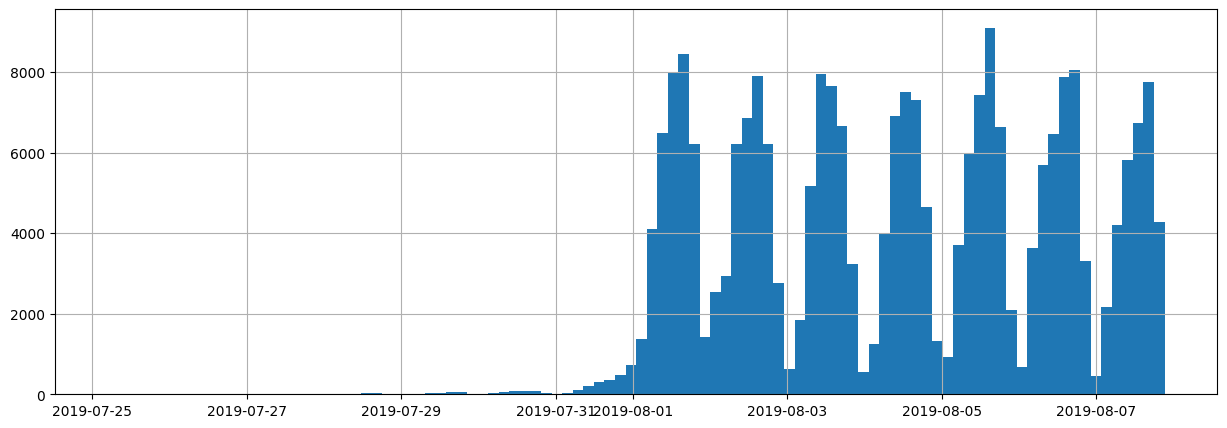

In [14]:
# Traza un histograma por fecha y hora (columna event_time).

df_logs['event_time'].hist(bins=100, figsize=(15,5))

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

La manera en que se muestran los datos en el histograma es correcta.
</div>

¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general.Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

Podemos ver que el momento en el que los datos empiezan a estar completos es a partir del 31 de julio.

In [15]:
# Eliminamos los datos que en sean < a la fecha 2019-08-01.

df_logs = df_logs[df_logs['event_time'] >= '2019-08-01'].reset_index(drop=True)
print(df_logs.head(5))
print()
print(df_logs.info())

           event_name              user_id          event_time  exp_id  \
0            Tutorial  3737462046622621720 2019-08-01 00:07:28     246   
1    MainScreenAppear  3737462046622621720 2019-08-01 00:08:00     246   
2    MainScreenAppear  3737462046622621720 2019-08-01 00:08:55     246   
3  OffersScreenAppear  3737462046622621720 2019-08-01 00:08:58     246   
4    MainScreenAppear  1433840883824088890 2019-08-01 00:08:59     247   

        fecha  
0  2019-08-01  
1  2019-08-01  
2  2019-08-01  
3  2019-08-01  
4  2019-08-01  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241298 entries, 0 to 241297
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  241298 non-null  object        
 1   user_id     241298 non-null  object        
 2   event_time  241298 non-null  datetime64[ns]
 3   exp_id      241298 non-null  int64         
 4   fecha       241298 non-null  object        
dtype

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Los datos han sido seleccionados basandote en los hallazgos anteriores
</div>

¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

No se perdieron muchos datos, tenemos un total de 241298 líneas de las 244126 que teníamos al principio eliminando los datos anteriores al 31 de julio de 2019.

In [17]:
# Asegúrate de tener usuarios de los tres grupos experimentales.
df_logs['exp_id'].unique()

array([246, 247, 248])

## Paso 4. Estudiar el embudo de eventos

In [18]:
# Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

print(df_logs['event_name'].value_counts())
print()
df_logs_event = df_logs['event_name'].value_counts() #  conteo de ocurrencias de cada valor único en la columna event_name
df_logs['frecuencia'] = df_logs['event_name'].map(df_logs_event) #creamos una nueva columna con la frecuencia de ocurrencia de cada valor en la columna event_name
df_logs_ordenado = df_logs.sort_values(by='frecuencia', ascending=False).reset_index(drop=True)
print(df_logs_ordenado.head(15))

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64

          event_name              user_id          event_time  exp_id  \
0   MainScreenAppear  5387094564511646555 2019-08-06 20:05:07     248   
1   MainScreenAppear  3077347585945449403 2019-08-04 03:51:40     247   
2   MainScreenAppear  3663291270136112912 2019-08-04 03:50:40     247   
3   MainScreenAppear  6395544220042674604 2019-08-06 16:17:48     247   
4   MainScreenAppear  6930800739214500166 2019-08-06 16:17:46     246   
5   MainScreenAppear  8171264792925263061 2019-08-04 03:51:16     246   
6   MainScreenAppear  5169134838889734460 2019-08-06 16:17:46     248   
7   MainScreenAppear  8871118565162926421 2019-08-04 03:51:30     248   
8   MainScreenAppear  9182444363400946277 2019-08-04 03:52:32     247   
9   MainScreenAppear   780131361822969739 2019-08-04 03:46:08     24

In [19]:
# Encuentra la cantidad de usuarios que realizaron cada una de estas acciones.

print(df_logs_ordenado.groupby('event_name')['user_id'].nunique())

# Ordena los eventos por el número de usuarios.

print()
embudo_df_logs= df_logs_ordenado.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
print(embudo_df_logs)

# Calcula la proporción de usuarios que realizaron la acción al menos una vez.

# Iteramos sobre cada evento único en el DataFrame y calculamos la proporción de usuarios que realizaron cada evento
print()
for event in df_logs_ordenado['event_name'].unique():
    users = df_logs_ordenado[df_logs_ordenado['event_name'] == event]['user_id'].nunique() # Usuarios por evento
    total_users = df_logs_ordenado['user_id'].nunique() # Usuarios totales en el df
    proportion = users / total_users
    print(f'La proporción de usuarios que realizaron la acción "{event}" al menos una vez es: {proportion:.2f}') # Proporción a dos decimales

event_name
CartScreenAppear           3734
MainScreenAppear           7419
OffersScreenAppear         4593
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

La proporción de usuarios que realizaron la acción "MainScreenAppear" al menos una vez es: 0.98
La proporción de usuarios que realizaron la acción "OffersScreenAppear" al menos una vez es: 0.61
La proporción de usuarios que realizaron la acción "CartScreenAppear" al menos una vez es: 0.50
La proporción de usuarios que realizaron la acción "PaymentScreenSuccessful" al menos una vez es: 0.47
La proporción de usuarios que realizaron la acción "Tutorial" al menos una vez es: 0.11


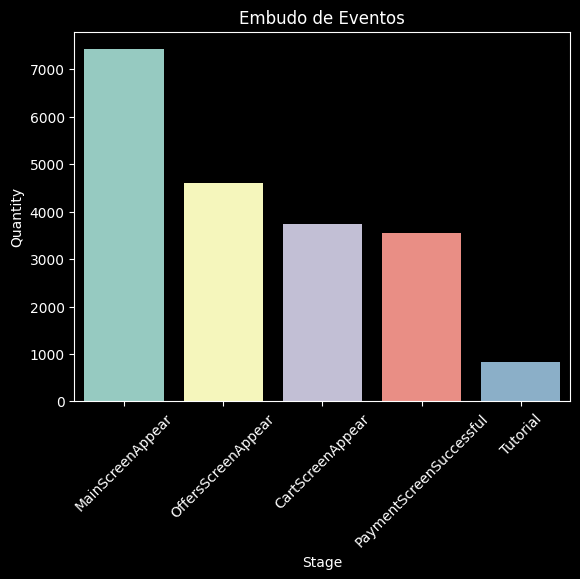

In [20]:
# ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Stage': ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial'],
    'Quantity': [7419, 4593, 3734, 3539, 840]
}

df = pd.DataFrame(data)

# Hacer que el fondo sea oscuro
plt.style.use("dark_background")

# Crear un gráfico de barras utilizando la librería seaborn
sns.barplot(x='Stage', y='Quantity', data=df)

# Agregar etiquetas y título al gráfico, rotar eje x 90°
plt.xlabel('Stage')
plt.ylabel('Quantity')
plt.title('Embudo de Eventos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [21]:
# Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente.
# Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

df['conv_sig_etapa'] = ((df['Quantity'] / df['Quantity'][0]).round(2))*100

# Diferencia entre etapas en la columna conv_sig_etapa y muestra la diferencia a dos dec

df['dif_etapa'] = df['conv_sig_etapa'].diff().round(2)
print(df)
print()
# ¿En qué etapa pierdes más usuarios?
print('Vemos que la etapa que perdió más usuarios fue de la primer etapa MainScreenAppear a  la segunda OffersScreenAppear con un porcentaje de -38%')

                     Stage  Quantity  conv_sig_etapa  dif_etapa
0         MainScreenAppear      7419           100.0        NaN
1       OffersScreenAppear      4593            62.0      -38.0
2         CartScreenAppear      3734            50.0      -12.0
3  PaymentScreenSuccessful      3539            48.0       -2.0
4                 Tutorial       840            11.0      -37.0

Vemos que la etapa que perdió más usuarios fue de la primer etapa MainScreenAppear a  la segunda OffersScreenAppear con un porcentaje de -38%


¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

Vemos que el 11% es el porcentaje de usuarios que pasa por todas las etapas

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto!<br/>
Buena manera de mostrar el resultado, se puede observar claramente la perdida de usuarios en cada una de las etapas

</div>

## Paso 5. Estudiar los resultados del experimento

In [22]:
# ¿Cuántos usuarios hay en cada grupo?

df_logs.groupby(['exp_id', 'event_name'])['user_id'].count()

exp_id  event_name             
246     CartScreenAppear           14711
        MainScreenAppear           37708
        OffersScreenAppear         14773
        PaymentScreenSuccessful    11910
        Tutorial                     323
247     CartScreenAppear           12456
        MainScreenAppear           39123
        OffersScreenAppear         15182
        PaymentScreenSuccessful    10043
        Tutorial                     343
248     CartScreenAppear           15198
        MainScreenAppear           40600
        OffersScreenAppear         16395
        PaymentScreenSuccessful    12160
        Tutorial                     373
Name: user_id, dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a><br/>

Correcto!<br/>    
Buena manera de ordenar los datos, se puede ver que los grupos son bastante similares en tamaño

</div>

In [23]:
# Crea un datasets llamadao exp_group_246 que contenga el número de user_id por día y por event_name

exp_group_246 = df_logs[df_logs['exp_id'] == 246].groupby(['fecha', 'event_name'])['user_id'].nunique().reset_index()
print(exp_group_246.head(10))
exp_group_247 = df_logs[df_logs['exp_id'] == 247].groupby(['fecha', 'event_name'])['user_id'].nunique().reset_index()
print(exp_group_247.head(10))
exp_group_248 = df_logs[df_logs['exp_id'] == 248].groupby(['fecha', 'event_name'])['user_id'].nunique().reset_index()
print(exp_group_248.head(10))

        fecha               event_name  user_id
0  2019-08-01         CartScreenAppear      497
1  2019-08-01         MainScreenAppear     1140
2  2019-08-01       OffersScreenAppear      656
3  2019-08-01  PaymentScreenSuccessful      452
4  2019-08-01                 Tutorial       50
5  2019-08-02         CartScreenAppear      513
6  2019-08-02         MainScreenAppear     1144
7  2019-08-02       OffersScreenAppear      687
8  2019-08-02  PaymentScreenSuccessful      469
9  2019-08-02                 Tutorial       57
        fecha               event_name  user_id
0  2019-08-01         CartScreenAppear      510
1  2019-08-01         MainScreenAppear     1216
2  2019-08-01       OffersScreenAppear      713
3  2019-08-01  PaymentScreenSuccessful      451
4  2019-08-01                 Tutorial       58
5  2019-08-02         CartScreenAppear      495
6  2019-08-02         MainScreenAppear     1167
7  2019-08-02       OffersScreenAppear      668
8  2019-08-02  PaymentScreenSuccessful  

In [24]:
# Agrega una columna al data set exp_group_246 que indique 246.

exp_group_246['exp_id'] = 246
exp_group_247['exp_id'] = 247
exp_group_248['exp_id'] = 248

# Une los datasets exp_group_246, exp_group_246 y exp_group_246 en un solo data frame

df_logs_exp = pd.concat([exp_group_246, exp_group_247, exp_group_248])
print(df_logs_exp.head(10))

        fecha               event_name  user_id  exp_id
0  2019-08-01         CartScreenAppear      497     246
1  2019-08-01         MainScreenAppear     1140     246
2  2019-08-01       OffersScreenAppear      656     246
3  2019-08-01  PaymentScreenSuccessful      452     246
4  2019-08-01                 Tutorial       50     246
5  2019-08-02         CartScreenAppear      513     246
6  2019-08-02         MainScreenAppear     1144     246
7  2019-08-02       OffersScreenAppear      687     246
8  2019-08-02  PaymentScreenSuccessful      469     246
9  2019-08-02                 Tutorial       57     246


In [25]:
# Cambia el nombre de la columna user_id por users_qty

df_logs_exp = df_logs_exp.rename(columns={'user_id': 'users_qty'})
print(df_logs_exp.head(3))

        fecha          event_name  users_qty  exp_id
0  2019-08-01    CartScreenAppear        497     246
1  2019-08-01    MainScreenAppear       1140     246
2  2019-08-01  OffersScreenAppear        656     246


In [26]:
from scipy import stats as st
import numpy as np

# Observa si hay una diferencia estadísticamente significativa entre las muestras exp_246 y exp_247
# Hipótesis nula: hay una diferencia estadísticamente significativa
alpha = 0.05

# scipy.stats.ttest_ind(exp_246, exp_247, equal_var)

results = st.ttest_ind(exp_group_246['user_id'], exp_group_247['user_id'])

print('valor p: ', results.pvalue) # extraer el valor p
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras 246 y 247")
else:
    print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa entre las muestras 246 y 247")
    print(results.pvalue)


valor p:  0.9820192822459893
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa entre las muestras 246 y 247
0.9820192822459893


Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba).

In [27]:
# Encuentra la cantidad de usuarios que realizaron el evento MainScreenAppear de los exp_id 246 y 247 del df_logs_exp

users_246_qty = df_logs_exp[(df_logs_exp['event_name'] == 'MainScreenAppear') & (df_logs_exp['exp_id'] == 246)]['users_qty'].sum()
print('cantidad de usuarios en evento MainScreenAppear del grupo 246=', users_246_qty)
users_247_qty = df_logs_exp[(df_logs_exp['event_name'] == 'MainScreenAppear') & (df_logs_exp['exp_id'] == 247)]['users_qty'].sum()
print('cantidad de usuarios en evento MainScreenAppear del grupo 247=', users_247_qty)

# Encuentra la proporción de los dos 'exp_id' 246 y 248

total_users = users_246_qty + users_247_qty
proporcion_246 = users_246_qty / total_users
print('proporción grupo 246 =', proporcion_246)
proporcion_247 = users_247_qty / total_users
print('proporción grupo 247 =', proporcion_247)

# Encuentra si hay diferencia significativa entre 'exp_id' == 246 y 'exp_id' == 248 solo en el evento "MainScreenAppear" de la columna "event_name"

results = st.ttest_ind(df_logs_exp[(df_logs_exp['event_name'] == 'MainScreenAppear') & (df_logs_exp['exp_id'] == 246)]['users_qty'], df_logs_exp[(df_logs_exp['event_name'] == 'MainScreenAppear') & (df_logs_exp['exp_id'] == 247)]['users_qty'])
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras 246 y 247")
    print(results.pvalue)
else:
    print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa entre las muestras 246 y 247")
    print(results.pvalue)

cantidad de usuarios en evento MainScreenAppear del grupo 246= 8043
cantidad de usuarios en evento MainScreenAppear del grupo 247= 8219
proporción grupo 246 = 0.494588611486902
proporción grupo 247 = 0.505411388513098
p-value: 0.3935679120702118
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa entre las muestras 246 y 247
0.3935679120702118


In [28]:
# Creamos una función para encuentrar en cada grupo la cantidad de usuarios que realizaron una acción, encontrar su proporción y comprobar si la diferencia entre los grupos es estadísticamente significativa.

import pandas as pd
from scipy import stats as st

def analizar_evento_grupos(df_logs_exp, event_name, exp_ids, alpha=0.05):

    try:
        resultados = {}
        total_usuarios = 0

        for exp_id in exp_ids:
            usuarios_evento = df_logs_exp[(df_logs_exp['event_name'] == event_name) & (df_logs_exp['exp_id'] == exp_id)]['users_qty']
            cantidad_usuarios = usuarios_evento.sum()
            resultados[exp_id] = {'cantidad_usuarios': cantidad_usuarios}
            total_usuarios += cantidad_usuarios

        if total_usuarios == 0:  # Validamos para evitar división por cero
            print("No se encontraron usuarios para el evento especificado en los grupos proporcionados.")
            return None

        for exp_id in exp_ids:
            resultados[exp_id]['proporcion'] = resultados[exp_id]['cantidad_usuarios'] / total_usuarios
            
        # Realizar la prueba t-test solo si hay dos grupos para comparar.
        if len(exp_ids) == 2:
            grupo1 = df_logs_exp[(df_logs_exp['event_name'] == event_name) & (df_logs_exp['exp_id'] == exp_ids[0])]['users_qty']
            grupo2 = df_logs_exp[(df_logs_exp['event_name'] == event_name) & (df_logs_exp['exp_id'] == exp_ids[1])]['users_qty']
            
            # Validar que al menos un grupo tenga datos antes de realizar la prueba t-test
            if not grupo1.empty and not grupo2.empty:
              results_ttest = st.ttest_ind(grupo1, grupo2)
              resultados['ttest'] = {
                  'pvalue': results_ttest.pvalue,
                  'rechaza_hipotesis_nula': results_ttest.pvalue < alpha
              }
            else:
              print("Uno o ambos grupos no tienen datos para el evento especificado. No se puede realizar la prueba t-test.")
              resultados['ttest'] = None
        elif len(exp_ids) > 2:
            print("Más de dos grupos proporcionados. La función solo realiza la prueba t-test para dos grupos.")
            resultados['ttest'] = None
        else:
            print("Se debe proporcionar al menos dos grupos para realizar la prueba t-test.")
            resultados['ttest'] = None

        return resultados

    except Exception as e:
        print(f"Error en la función: {e}")
        return None

In [29]:
resultados = analizar_evento_grupos(df_logs_exp, 'MainScreenAppear', [246, 247])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 8043
Proporción grupo 246 = 0.494588611486902
Cantidad de usuarios del grupo 247 = 8219
Proporción grupo 247 = 0.505411388513098
p-value: 0.3935679120702118
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [30]:
# Usamos la función analizar_eventos_exp para 'CartScreenAppear"

resultados = analizar_evento_grupos(df_logs_exp, 'CartScreenAppear', [246, 247])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 3538
Proporción grupo 246 = 0.5029140014214641
Cantidad de usuarios del grupo 247 = 3497
Proporción grupo 247 = 0.4970859985785359
p-value: 0.45738561642044917
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [31]:
# Usamos la función analizar_eventos_exp para 'OfferScreenAppear"

resultados = analizar_evento_grupos(df_logs_exp, 'OfferScreenAppear', [246, 247])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

No se encontraron usuarios para el evento especificado en los grupos proporcionados.
No se pudieron realizar los análisis.


In [32]:
# Usamos la función analizar_eventos_exp para 'PaymentScreenSuccessful"

resultados = analizar_evento_grupos(df_logs_exp, 'PaymentScreenSuccessful', [246, 247])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 3311
Proporción grupo 246 = 0.5048795364440378
Cantidad de usuarios del grupo 247 = 3247
Proporción grupo 247 = 0.4951204635559622
p-value: 0.24056150540306379
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [33]:
# Usamos la función analizar_eventos_exp para 'Tutorial"

resultados = analizar_evento_grupos(df_logs_exp, 'Tutorial', [246, 247])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 282
Proporción grupo 246 = 0.4912891986062718
Cantidad de usuarios del grupo 247 = 292
Proporción grupo 247 = 0.5087108013937283
p-value: 0.8379775548633102
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


¿Puedes confirmar que los grupos se dividieron correctamente?

Vemos que los datos se dividieron de forma correcta, ya que de acuerdo a los resultados no se encontró evidencia de una diferencia significativa.

Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control.

In [34]:
resultados = analizar_evento_grupos(df_logs_exp, 'MainScreenAppear', [246, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 8043
Proporción grupo 246 = 0.49277049381203286
Cantidad de usuarios del grupo 248 = 8279
Proporción grupo 248 = 0.5072295061879671
p-value: 0.2527868023318047
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [35]:
resultados = analizar_evento_grupos(df_logs_exp, 'CartScreenAppear', [246, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 3538
Proporción grupo 246 = 0.5004951195360022
Cantidad de usuarios del grupo 248 = 3531
Proporción grupo 248 = 0.4995048804639977
p-value: 0.8981940143595246
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [36]:
resultados = analizar_evento_grupos(df_logs_exp, 'OffersScreenAppear', [246, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 4891
Proporción grupo 246 = 0.5002557021581262
Cantidad de usuarios del grupo 248 = 4886
Proporción grupo 248 = 0.4997442978418738
p-value: 0.9521413199050492
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [37]:
resultados = analizar_evento_grupos(df_logs_exp, 'PaymentScreenSuccessful', [246, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 3311
Proporción grupo 246 = 0.5003022061045633
Cantidad de usuarios del grupo 248 = 3307
Proporción grupo 248 = 0.49969779389543667
p-value: 0.9466881693402707
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [38]:
resultados = analizar_evento_grupos(df_logs_exp, 'Tutorial', [246, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 246 = 282
Proporción grupo 246 = 0.4973544973544973
Cantidad de usuarios del grupo 248 = 285
Proporción grupo 248 = 0.5026455026455027
p-value: 0.9467225973458759
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [39]:
resultados = analizar_evento_grupos(df_logs_exp, 'MainScreenAppear', [247, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 247 = 8219
Proporción grupo 247 = 0.4981815977694266
Cantidad de usuarios del grupo 248 = 8279
Proporción grupo 248 = 0.5018184022305734
p-value: 0.7816239522799555
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [40]:
resultados = analizar_evento_grupos(df_logs_exp, 'CartScreenAppear', [247, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 247 = 3497
Proporción grupo 247 = 0.49758110415480933
Cantidad de usuarios del grupo 248 = 3531
Proporción grupo 248 = 0.5024188958451906
p-value: 0.5864714314554476
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [41]:
resultados = analizar_evento_grupos(df_logs_exp, 'OffersScreenAppear', [247, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 247 = 4880
Proporción grupo 247 = 0.49969281179602704
Cantidad de usuarios del grupo 248 = 4886
Proporción grupo 248 = 0.500307188203973
p-value: 0.9373705306000786
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [42]:
resultados = analizar_evento_grupos(df_logs_exp, 'PaymentScreenSuccessful', [247, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 247 = 3247
Proporción grupo 247 = 0.4954226426609704
Cantidad de usuarios del grupo 248 = 3307
Proporción grupo 248 = 0.5045773573390296
p-value: 0.31553951715645945
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


In [43]:
resultados = analizar_evento_grupos(df_logs_exp, 'Tutorial', [247, 248])

if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")

Cantidad de usuarios del grupo 247 = 292
Proporción grupo 247 = 0.5060658578856152
Cantidad de usuarios del grupo 248 = 285
Proporción grupo 248 = 0.49393414211438474
p-value: 0.8812905610660384
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy buena manera de probar la hipotesis, comprobando (en este caso) que los grupos son similares
 
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

El siguiente código ha sido repetido 
```
if resultados:
    for exp_id in resultados:
        if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
            print(f"Cantidad de usuarios del grupo {exp_id} = {resultados[exp_id]['cantidad_usuarios']}")
            print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
    if 'ttest' in resultados and resultados['ttest'] is not None: # Imprimir el resultado del t-test si existe
        print('p-value:', resultados['ttest']['pvalue'])
        if resultados['ttest']['rechaza_hipotesis_nula']:
            print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
        else:
            print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
else:
    print("No se pudieron realizar los análisis.")
```

Se puede hacer una función que reemplace todas las celdas anteriores, que reciba `resultados` como argumento y simplificar el código, te dejo el ejemplo en la celda de abajo
 
</div>

In [46]:
def mostrar_resultado(var_resultado):
    if var_resultado:
        for exp_id in var_resultado:
            if exp_id != 'ttest': # Imprimir resultados de cada grupo, excepto el t-test
                print(f"Cantidad de usuarios del grupo {exp_id} = {var_resultado[exp_id]['cantidad_usuarios']}")
                print(f"Proporción grupo {exp_id} = {resultados[exp_id]['proporcion']}")
        if 'ttest' in var_resultado and var_resultado['ttest'] is not None: # Imprimir el resultado del t-test si existe
            print('p-value:', resultados['ttest']['pvalue'])
            if resultados['ttest']['rechaza_hipotesis_nula']:
                print("Rechazamos la hipótesis nula, sí hay una diferencia significativa entre las muestras")
            else:
                print("No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa")
    else:
        print("No se pudieron realizar los análisis.")
        
        
resultados = analizar_evento_grupos(df_logs_exp, 'MainScreenAppear', [246, 247])
mostrar_resultado(resultados)
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-')
resultados = analizar_evento_grupos(df_logs_exp, 'CartScreenAppear', [246, 247])
mostrar_resultado(resultados)
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-')
resultados = analizar_evento_grupos(df_logs_exp, 'PaymentScreenSuccessful', [247, 248])
mostrar_resultado(resultados)

Cantidad de usuarios del grupo 246 = 8043
Proporción grupo 246 = 0.494588611486902
Cantidad de usuarios del grupo 247 = 8219
Proporción grupo 247 = 0.505411388513098
p-value: 0.3935679120702118
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Cantidad de usuarios del grupo 246 = 3538
Proporción grupo 246 = 0.5029140014214641
Cantidad de usuarios del grupo 247 = 3497
Proporción grupo 247 = 0.4970859985785359
p-value: 0.45738561642044917
No rechazamos la hipótesis nula, no hay suficiente evidencia de una diferencia significativa
-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Cantidad de usuarios del grupo 247 = 3247
Proporción grupo 247 = 0.4954226426609704
Cantidad de usuarios del grupo 248 = 3307
Proporción grupo 248 = 0.5045773573390296
p-value: 0.31553951715645945
No rechazamos 

¿Qué conclusiones puedes sacar del experimento? Vemos que tampoco para este grupo hay una diferencia estadísticamente significativa en la conversión entre los grupos.

¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones. Hemos establecido un nivel de significacia del .05. Hicimos un total de 15 pruebas en la que pudimos demostrar que no había un diferencia estadisticamente significativa entre los grupos.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos.<br/>
 
Las decisiones que tomas a lo largo del proyecto me parecen acertadas y te hacen ir por un buen camino, lo que termina en un analisis bastante acertado.    
<br/>
Las conclusiones finales a las que llegas estan respaldadas con los procedimientos que has realizado a lo largo del proyecto, me parecen bastante acertadas y el lenguaje que usas es adecuado para que cualquier persona las pueda entender.
<br/> <br/> 

    
    
Este tipo de analisis ayudará al negocio a enfocarse en partes especificas de los distintos eventos que los usuarios toman para llegar a realizar una compra, en este caso se pueden enfocar en la parte donde se pierden la mayoría de usuarios que es el pasar de la pantalla principal a la pantalla de ofertas. Se pueden crear distintas maneras de generar mas enganche para que cada vez más personas pasen de una etapa a la siguiente.<br/>
</div>
